In [2]:
path = '../../Data/data/'

In [3]:
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now load the questionnaire related data from OUH and AUH 

In [4]:
#load the GN data files from AUH and OUH
with open(path + 'WP4_OUH_GN_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_GN_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 GN data loaded')

#load the Oticon data files from AUH and OUH
with open(path + 'WP4_OUH_Oticon_TPI.csv') as input: 
    WP4_OUH_GN = pd.read_csv(input)
with open(path + 'WP4_AUH_Oticon_TPI.csv') as input: 
    WP4_AUH_GN = pd.read_csv(input)
print('WP4 Oticon data loaded')

#load the Widex data files from AUH and OUH
with open(path + 'WP4_OUH_Widex_TPI.csv') as input: 
    WP4_OUH_Widex = pd.read_csv(input)
with open(path + 'WP4_AUH_Widex_TPI.csv') as input: 
    WP4_AUH_Widex = pd.read_csv(input)
print('WP4 Widex data loaded')



WP4 GN data loaded
WP4 Oticon data loaded
WP4 Widex data loaded


In [5]:
WP4_AUH_GN.head(20)

,Unnamed: 0,RC_ID,ds_re,ds_le,srt_re,srt_le,ac_re_250hz,ac_re_500hz,ac_re_1000hz,ac_re_2000hz,...,visit_4_fitting report,hint_srt_v4,sound_id_pct_v4,noise_ann_number_v4,noise_ann_critic_v4,spa_hea_direc_v4,spa_hea_w_reg_v4,jfc_srt_v4,comments,schedule_complete
0,1,WP4-365-0016,100,96,15,10,20,25,15,30,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,WP4-365-0017,88,100,25,20,30,25,25,30,...,Yes,-2.2,93.0,7.0,1.0,76.0,100.0,8.8,NaN,NaN
2,3,WP4-365-0027,96,96,10,15,10,15,20,30,...,Yes,-1.3,93.0,7.0,0.0,72.0,100.0,5.6,NaN,NaN
3,4,WP4-365-0030,84,92,20,20,15,20,25,50,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,WP4-365-0031,96,96,5,5,15,10,10,35,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,WP4-365-0032,100,88,35,25,25,35,45,35,...,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,WP4-365-0033,88,84,10,20,10,10,25,55,...,Yes,0.1,80.0,7.0,0.0,56.0,92.0,7.2,NaN,NaN


In [6]:
#merge the AUH and OUH data
WP4_GN = pd.concat([WP4_OUH_GN, WP4_AUH_GN],axis=0).reset_index().drop(['index','Unnamed: 0'],axis=1)

In [7]:
WP4_GN['RC_ID']

0            364-2
1            364-4
2            364-6
3            364-8
4           364-10
5           364-12
6           364-14
7           364-16
8           364-18
9           364-72
10          364-80
11         364-110
12         364-114
13         364-118
14         364-126
15    WP4-365-0016
16    WP4-365-0017
17    WP4-365-0027
18    WP4-365-0030
19    WP4-365-0031
20    WP4-365-0032
21    WP4-365-0033
Name: RC_ID, dtype: object

In [8]:
WP4_GN.keys()[:30]

Index(['RC_ID', 'ds_re', 'ds_le', 'srt_re', 'srt_le', 'ac_re_250hz',
       'ac_re_500hz', 'ac_re_1000hz', 'ac_re_2000hz', 'ac_re_3000hz',
       'ac_re_4000hz', 'ac_re_6000hz', 'ac_re_8000hz', 'ac_le_250hz',
       'ac_le_500hz', 'ac_le_1000hz', 'ac_le_2000hz', 'ac_le_3000hz',
       'ac_le_4000hz', 'ac_le_6000hz', 'ac_le_8000hz', 'Region', 'sex', 'age',
       'Profile', 'hint_srt_re', 'hint_srt_le', 'hint_srt_bin',
       'acalos_htl_re_250hz', 'acalos_htl_re_500hz'],
      dtype='object')

## Now load the REM data files

In [9]:
path = '../../Data/REM/WP4/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX REM Files OUH/'

In [10]:
#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
    cnt += 1
df_REM = pd.concat(REM_)

../../Data/REM/WP4/WP4-364-102 first fit.txt


NameError: name 'df_REM' is not defined

In [11]:
for patient_idx in range(len(text_files)):
    df = REM[patient_idx]

    freqs_s = list(df.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df[['Test']] == 'REIG 65').values * (df[['Ear']] == 'Left').values ))
    
    plt.figure(figsize=(9,3))
    plt.subplot(1,2,2)
    plt.semilogx(freqs,df.iloc[id_left,3:],'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(-5, 40)

    plt.subplot(1,2,1)
    plt.semilogx(freqs,df.iloc[id_right,3:],'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-5, 40)


KeyError: 1

## Target analysis - draft

In [12]:
def calculateBEARtarget(audiogram, profile):
    betas = dict()
    betas['A'] = np.array([[0, 0, 1, 5, 5, 3, 3],
                           [0, 0, -2, 0, 0, 0, 0],
                           [0, 0, -5, -5, -5, -5, -5]])
    betas['B'] = np.array([[-3, -3, 1, 5, 5, 7, 7],
                           [-3, -3, -2, 0, 0, 0, 0],
                           [-6, -6, -9, -9, -9, -9, -9]])
    betas['C'] = np.array([[-2, -1.3, 1, 4, 7, 7, 7],
                           [-10, -10, -5, 0, 0, 0, 0],
                           [-14, -14, -14, -14, -14, -14, -14]])
    betas['D'] = np.array([[0, 0, 0, 3, 2, 2, 2],
                           [-6, -6, -6, -3, -3, -3, -3],
                           [-10, -10, -10, -10, -14, -14, -14]])
    target = 0.31*np.array([audiogram, audiogram, audiogram]) + betas[profile]
    
    target[target < 0] = 0

    return target

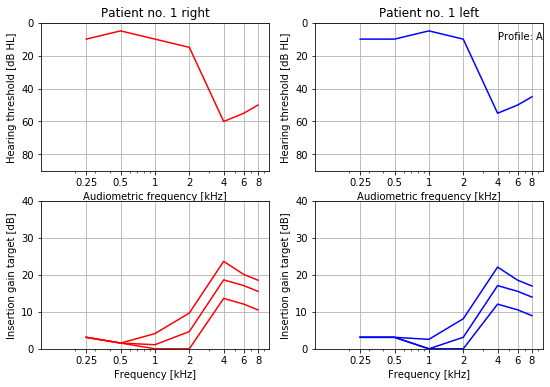

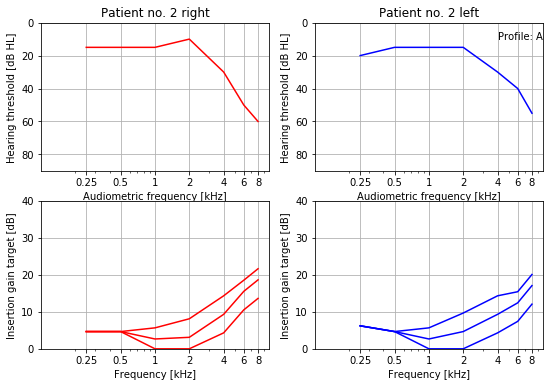

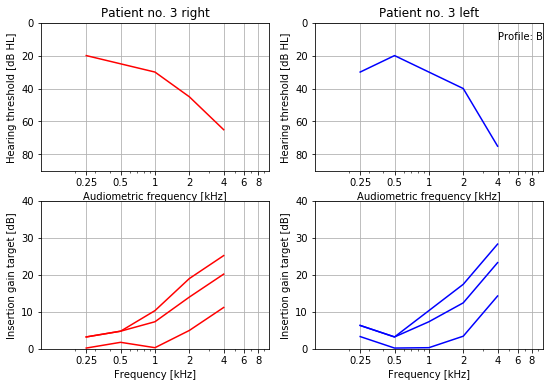

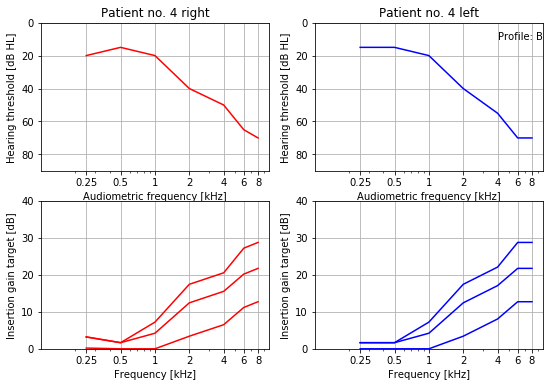

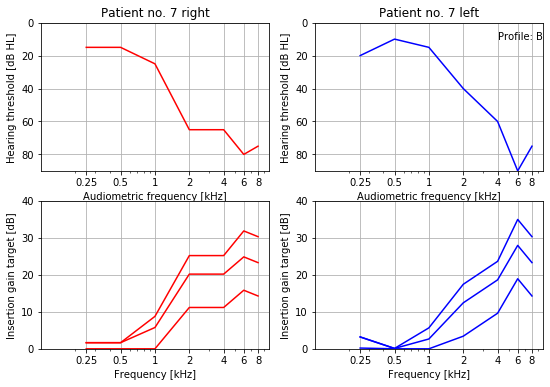

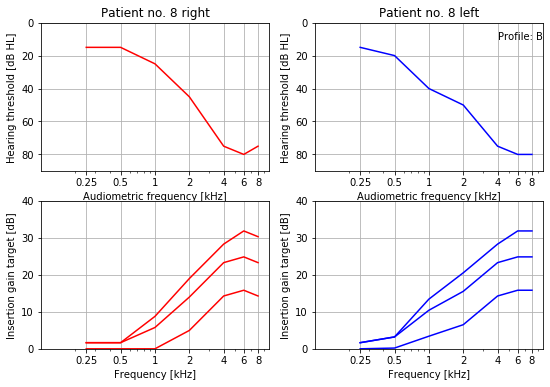

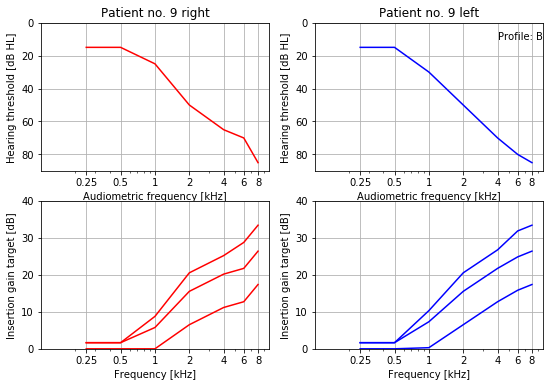

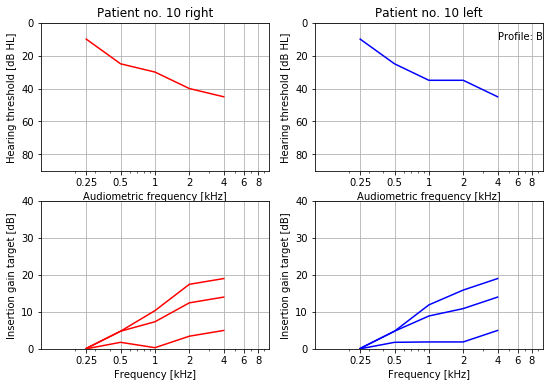

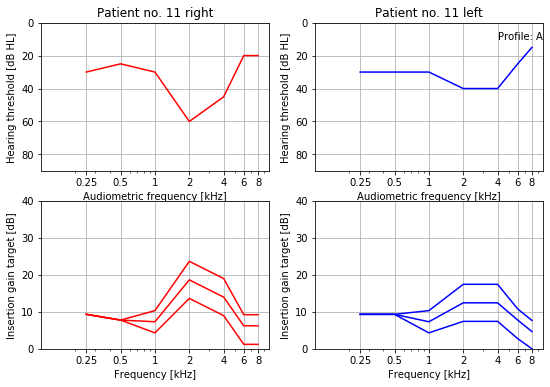

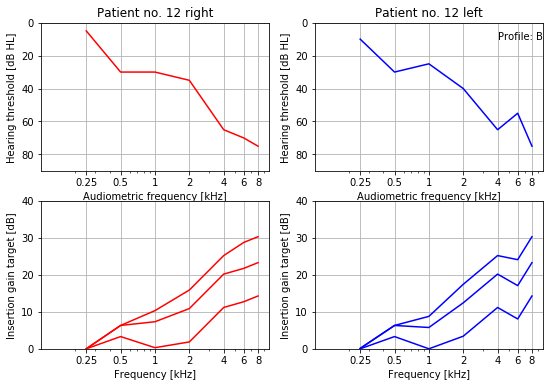

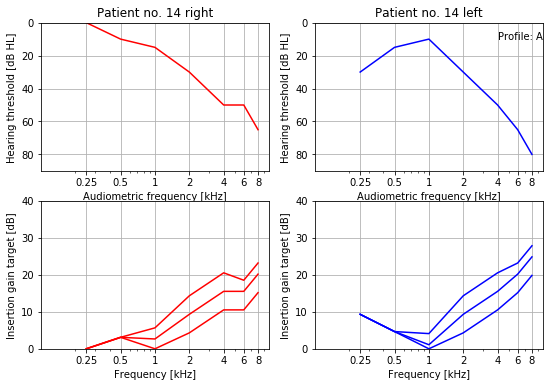

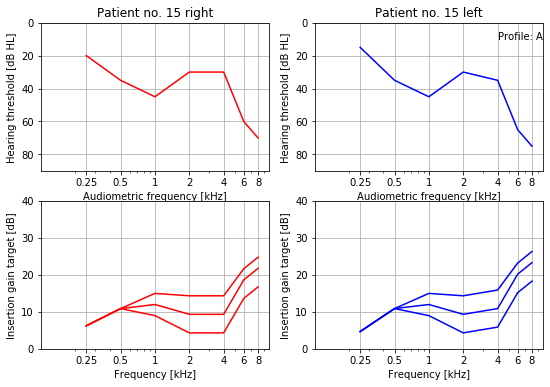

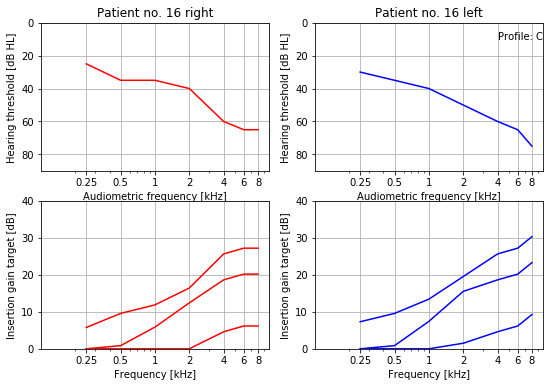

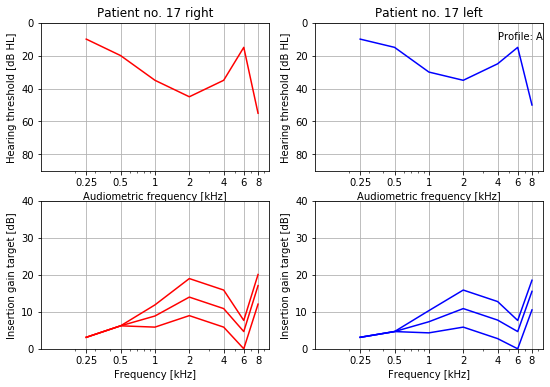

In [13]:
path = '../../Data/data/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4_Pilots_Data_OUH_GN.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)
    
    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs_audio_no3k,target_right[0,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[1,:],'r')
    plt.semilogx(freqs_audio_no3k,target_right[2,:],'r')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs_audio_no3k,target_left[0,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[1,:],'b')
    plt.semilogx(freqs_audio_no3k,target_left[2,:],'b')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')


In [14]:
#load the packages 
#import necessary packages 
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from pandas import ExcelFile


## Now try to smooth the REM data 

In [15]:
path = '../../Data/REM/WP4/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/WIDEX REM Files OUH/'

#load all the GN REM data files from sharepoint
import os
#text_files = [f for f in os.listdir(path) if f.endswith('.txt')]
text_files = [f for f in os.listdir(path) if f.endswith('first fit.txt')]

REM = {}
REM_ = []
cnt = 0
for f in text_files:
    print(path+f)
    REM[cnt] = pd.read_csv(path + f,sep=';', skipinitialspace=True, index_col=False)
    #REM[cnt].drop('RC_ID', axis=1, inplace = True)
    REM_.append(pd.DataFrame(REM[cnt]))
    cnt += 1
df_REM = pd.concat(REM_)



#smoothing 
np.savetxt(path + 'REM_data_WP4.txt', df_REM.loc[:,'86':'9976'], fmt='%f')
#now load the smoothed data again (you need to run Smoothing_REM_input.m in Matlab in order to create the file)
df_REM.reset_index(inplace=True)
REM_smooth = pd.concat((df_REM.iloc[:,0:4], pd.read_csv(path + 'Smoothed_REM_WP4.csv', names= df_REM.loc[:,'86':'9976'].columns)),axis=1).iloc[:,1:]



../../Data/REM/WP4/WP4-364-102 first fit.txt
../../Data/REM/WP4/WP4-364-104 first fit.txt
../../Data/REM/WP4/WP4-364-112 first fit.txt
../../Data/REM/WP4/WP4-364-120 first fit.txt
../../Data/REM/WP4/WP4-364-42 first fit.txt
../../Data/REM/WP4/WP4-364-44 first fit.txt
../../Data/REM/WP4/WP4-364-50 first fit.txt
../../Data/REM/WP4/WP4-364-56 first fit.txt
../../Data/REM/WP4/WP4-364-58 first fit.txt
../../Data/REM/WP4/WP4-364-60 first fit.txt
../../Data/REM/WP4/WP4-364-62 first fit.txt
../../Data/REM/WP4/WP4-364-78 first fit.txt
../../Data/REM/WP4/WP4-364-82 first fit.txt
../../Data/REM/WP4/WP4-364-84 first fit.txt
../../Data/REM/WP4/WP4-364-86 first fit.txt
../../Data/REM/WP4/WP4-364-96 first fit.txt
../../Data/REM/WP4/WP4-364-98 first fit.txt
../../Data/REM/WP4/WP4-365-0036 first fit.txt
../../Data/REM/WP4/WP4-365-0039 first fit.txt


In [16]:
REM_smooth

,RC_ID,Test,Ear,86,129,172,215,258,301,344,...,9589,9632,9675,9718,9761,9804,9847,9890,9933,9976
0,364-102_GN_REM_fitting,REUG 70,Left,1.38110,1.21520,0.53155,0.34786,0.02569,-0.19486,-0.62946,...,1.0579,1.2441,1.4003,1.5557,1.71520,1.71520,1.8586,1.99030,2.128700,2.279700
1,364-102_GN_REM_fitting,REUG 70,Right,-0.75969,-0.51844,-0.20129,-0.29751,-0.41651,-0.51911,-1.02900,...,2.0811,2.2767,2.4842,2.7026,2.91800,2.91800,3.1435,3.38020,3.614600,3.848200
2,364-102_GN_REM_fitting,REOG 70,Left,1.81420,1.66060,0.97968,0.84158,0.67105,0.64097,0.78580,...,-5.9322,-5.9081,-5.8839,-5.8428,-5.82130,-5.82130,-5.8282,-5.84420,-5.869600,-5.898800
3,364-102_GN_REM_fitting,REOG 70,Right,-0.39829,-0.13194,0.23296,0.17280,0.10226,0.03059,-0.74711,...,-3.2335,-3.2308,-3.2026,-3.1613,-3.12740,-3.12740,-3.0818,-3.03090,-2.986800,-2.938500
4,364-102_GN_REM_fitting,REIG 65,Left,0.32855,0.25363,0.14896,0.23033,0.21501,0.59602,1.30660,...,6.6431,6.2356,5.8378,5.4511,5.05660,5.05660,4.6947,4.34250,3.961500,3.574400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,WP4-365-0039 first fit,REIG 55,Left,-0.64721,-0.20738,0.76310,0.86784,1.21070,1.67950,2.20580,...,2.0050,1.6902,1.3684,1.0826,0.81555,0.81555,0.5510,0.29094,0.089236,-0.066819
594,WP4-365-0039 first fit,REIG 80,Right,0.85435,0.92541,1.16400,1.30530,1.62180,1.97900,2.26350,...,10.4080,10.2950,10.1670,9.9947,9.80340,9.80340,9.6008,9.40630,9.233100,8.987800
595,WP4-365-0039 first fit,REIG 80,Left,0.88644,0.87903,0.90836,1.02090,1.22120,1.47580,1.85920,...,5.7453,5.5307,5.3052,5.0765,4.86160,4.86160,4.6737,4.53650,4.472900,4.426400
596,WP4-365-0039 first fit,LTASS 65,Right,1.39350,1.46600,1.36390,1.29410,1.44110,1.80930,2.20480,...,7.7602,7.4921,7.2335,6.9861,6.73260,6.73260,6.4850,6.24080,6.013100,5.758400


## Try to plot both smoothed insertion gain and targets

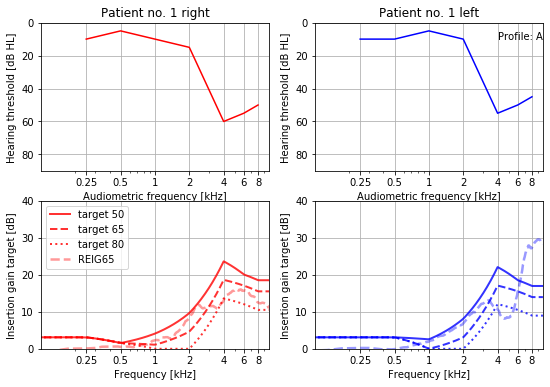

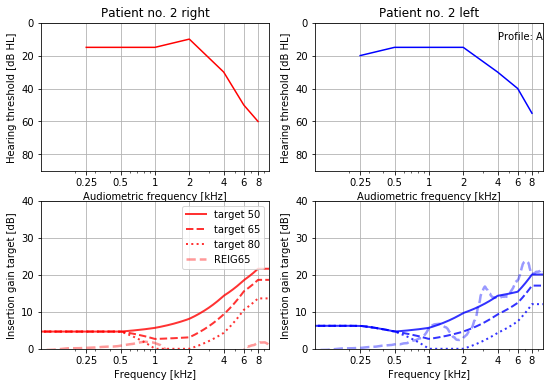

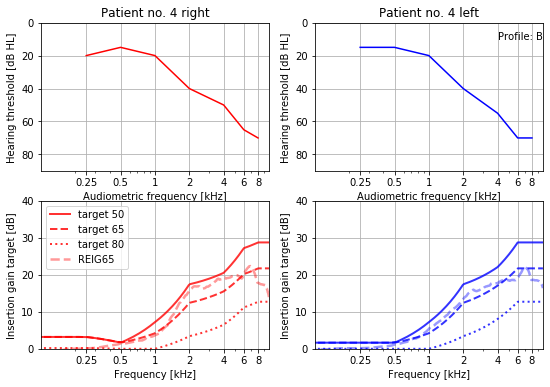

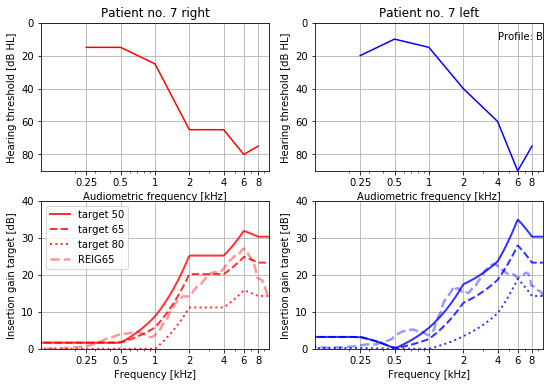

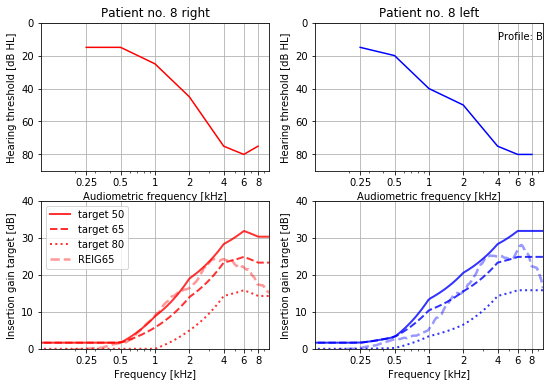

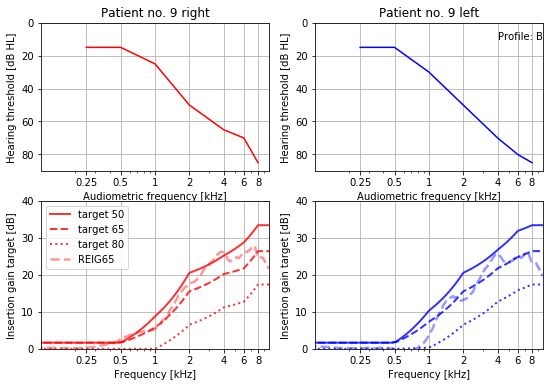

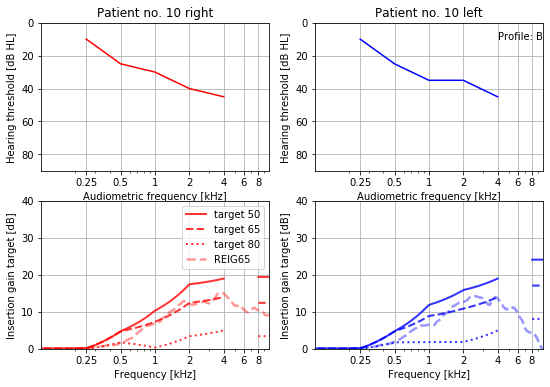

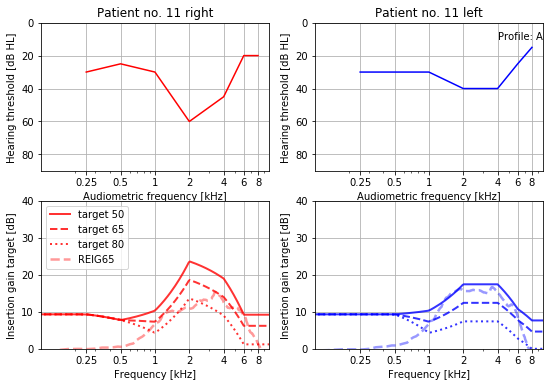

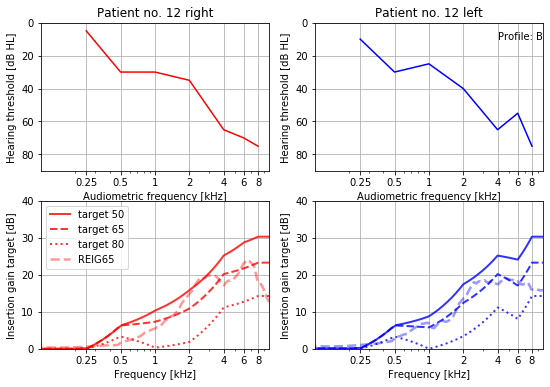

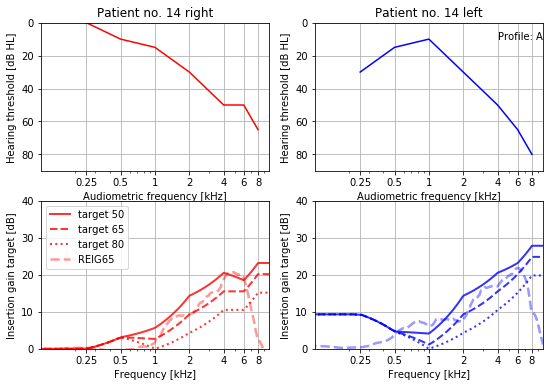

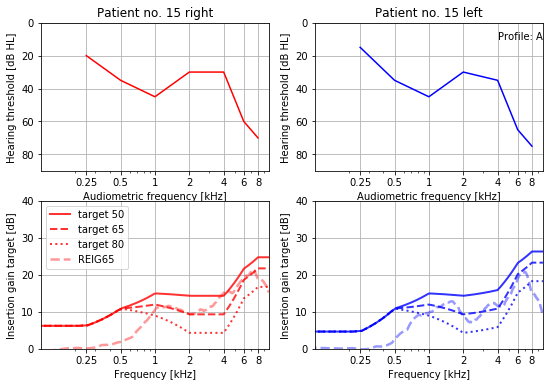

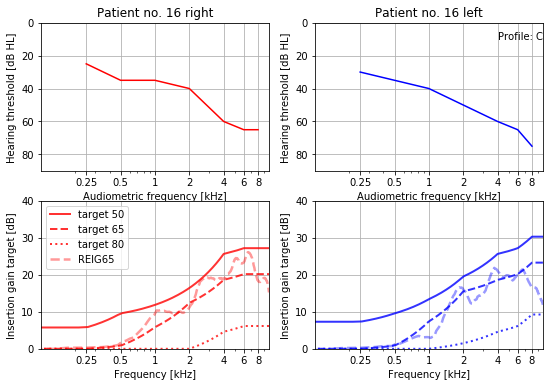

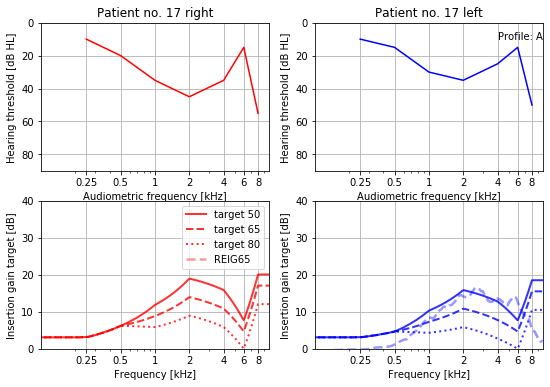

In [17]:
#path for other data 
path = '../../Data/data/'
#path = 'C:/Users/boko/OneDrive - WSA/Documents/BEAR/BEAR_pilot_data/'
df = pd.read_excel(path+'WP4_Pilots_Data_OUH_GN.xlsx')
nrows, _ = df.shape

freqs_audio_no3k = [250, 500, 1000, 2000, 4000, 6000, 8000]


for patient_idx in range(nrows):
    audio_left  = pd.concat([df.iloc[patient_idx,5:9], df.iloc[patient_idx,10:13]])
    audio_right = pd.concat([df.iloc[patient_idx,13:17], df.iloc[patient_idx,18:21]])
    profile = df.iloc[patient_idx, 24]
    
    if profile == 'O':
        continue
    
    target_left = calculateBEARtarget(np.array(audio_left), profile)
    target_right = calculateBEARtarget(np.array(audio_right), profile)


    #now get the corresponding REM     
    df_ = REM_smooth[REM_smooth['RC_ID'].str.contains(df.iloc[patient_idx,0][4:])]

    if(df_.empty):
        continue

    freqs_s = list(df_.columns)
    freqs_s = freqs_s[3:]
    freqs = [float(s) for s in freqs_s]

    id_right = np.max(np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Right').values ))
    id_left = np.max(np.where( (df_[['Test']] == 'REIG 65').values * (df_[['Ear']] == 'Left').values ))
        

    #interpolate the frequencies and values of the audiogram 
    target_left_ = []
    target_right_ = []
    for idx in range(3):
        target_left_.append(np.interp(freqs, freqs_audio_no3k, target_left[idx,:].astype('float64')))
        target_right_.append(np.interp(freqs, freqs_audio_no3k, target_right[idx,:].astype('float64')))

    target_left__ = np.array(target_left_)
    target_right__ = np.array(target_right_)
    

    plt.figure(figsize=(9,6))
    plt.subplot(2,2,1)
    plt.semilogx(freqs_audio_no3k,-audio_right,'r')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')
    
    plt.subplot(2,2,2)
    plt.semilogx(freqs_audio_no3k,-audio_left,'b')
    plt.grid()
    plt.title(f"Patient no. {patient_idx+1} left")
    plt.text(4000, -10, "Profile: "+profile)
    plt.ylim(-90, 0)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, -20, -40, -60, -80], [0, 20, 40, 60, 80])
    plt.xlabel('Audiometric frequency [kHz]')
    plt.ylabel('Hearing threshold [dB HL]')    
    
    
    plt.subplot(2,2,3)
    plt.semilogx(freqs,target_right__[0,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'solid',label='target 50')
    plt.semilogx(freqs,target_right__[1,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dashed',label='target 65')
    plt.semilogx(freqs,target_right__[2,:],'r',linewidth = 2,alpha = 0.8, linestyle = 'dotted',label='target 80')
    #REM 2 REIG65dB
    plt.semilogx(freqs,df_.iloc[id_right,3:],'r',linewidth=2.5,alpha=0.4,linestyle='dashed',label='REIG65')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} right")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')
    plt.legend()
    
    plt.subplot(2,2,4)
    plt.semilogx(freqs,target_left__[0,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'solid')
    plt.semilogx(freqs,target_left__[1,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dashed')
    plt.semilogx(freqs,target_left__[2,:],'b',linewidth = 2,alpha = 0.8, linestyle = 'dotted')
    #REM @ REIG65dB
    plt.semilogx(freqs,df_.iloc[id_left,3:],'b',linewidth=2.5,alpha=0.4,linestyle='dashed')
    plt.grid()
    #plt.title(f"Patient no. {patient_idx+1} left")
    plt.ylim(0, 40)
    plt.xlim(100, 10000)
    plt.xticks(freqs_audio_no3k, [.25, .5, 1, 2, 4, 6, 8])
    plt.yticks([0, 10, 20, 30, 40], [0, 10, 20, 30, 40])
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Insertion gain target [dB]')